# Temporal evolution, two zones,  cooling+acc+adb exp


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.3.0rc9


We load the model of the flare simulated in :ref:`temp_ev_two_zone_cooling_acc`. And the we evolve the radiative region under the effect of radiative plus adiabatic cooling

In [4]:
from jetset.jet_timedep import JetTimeEvol

temp_ev_acc=JetTimeEvol.load_model('two_zone_rad_acc.pkl')

===> setting C threads to 12
===> setting C threads to 12


In [5]:
temp_ev_acc.show_model()

--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,5.000000e+01,s,0.00029979245799999996,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Adiab. cooling,,on,,None,,False
Reg. expansion,,off,,None,,False
Diff coeff,,6.666667e-06,s-1,None,,False
Acc coeff,,4.000000e-05,s-1,None,,False
Diff index,,2.000000e+00,,None,,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+06,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,T_esc_acc,escape_time,(R_acc/c)*,3.000000e+00,--,--,False,True
jet_time_ev,Esc_Index_acc,fp_coeff_index,,0.000000e+00,--,--,False,True


here we set some relevant parameters that will be described in detail in the next version of the documentation 

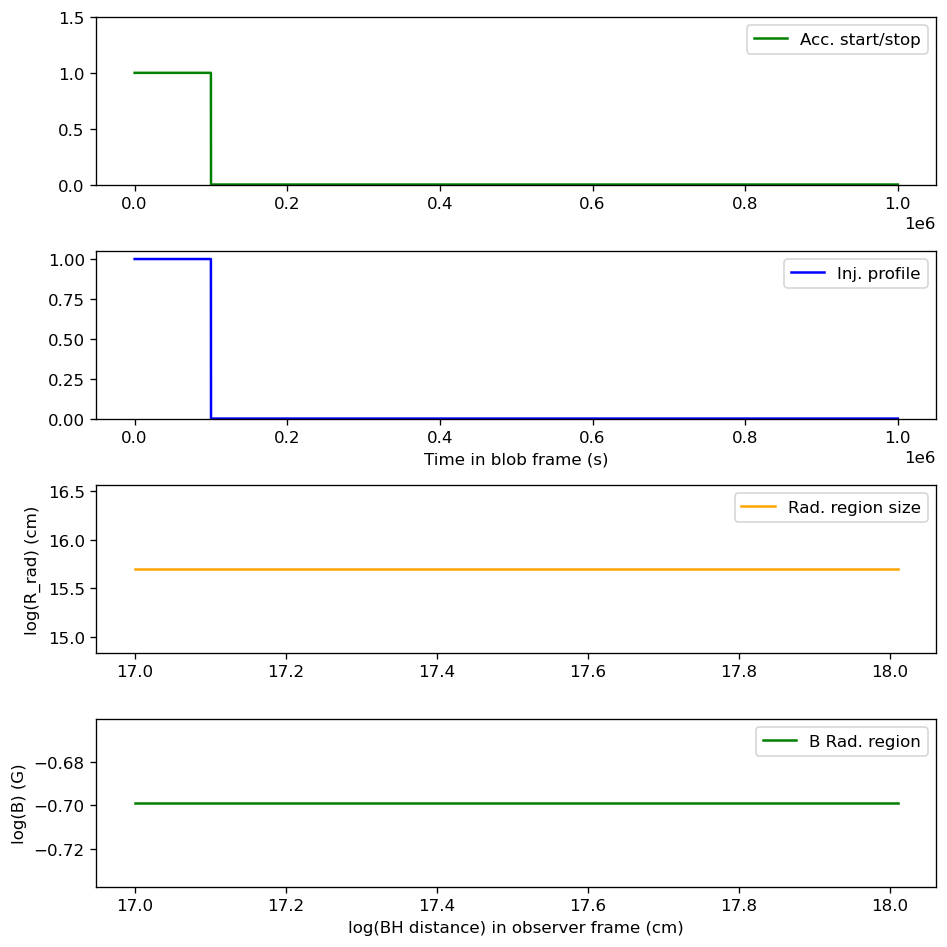

In [6]:
temp_ev_acc.plot_time_profile()

Particle spectrum in the radiative region

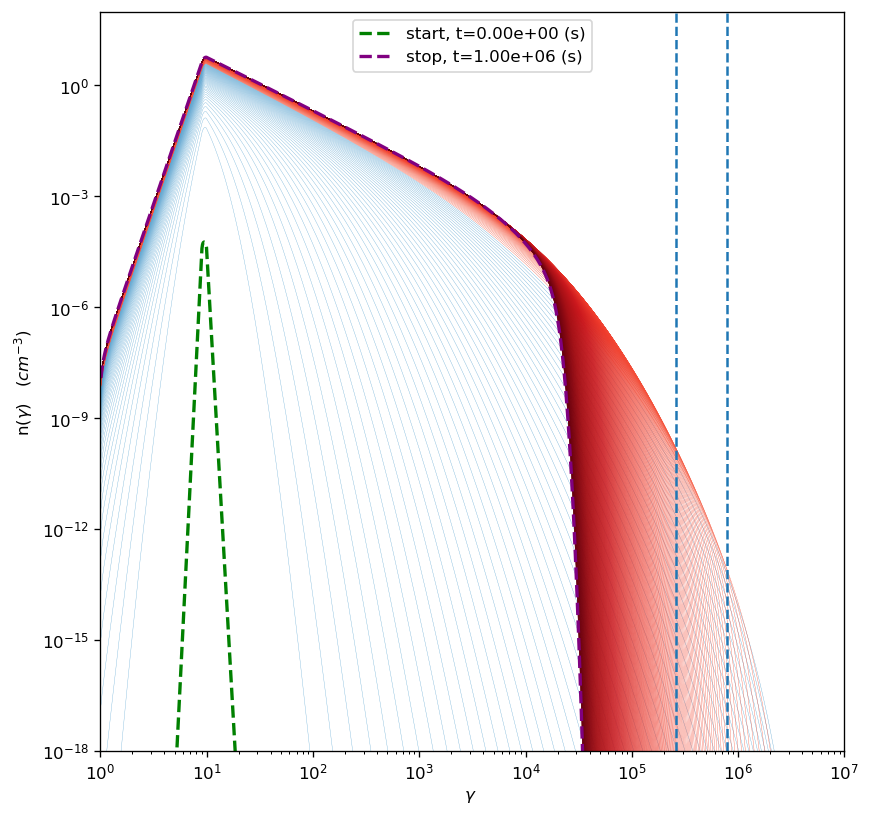

In [7]:
p=temp_ev_acc.plot_tempev_emitters(region='rad',loglog=False,energy_unit='gamma',pow=0)
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_A, ls='--')
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_DA, ls='--')
p.setlim(x_max=1E7,x_min=1,y_min=1E-18,y_max=100)

SEDs in the radiation region

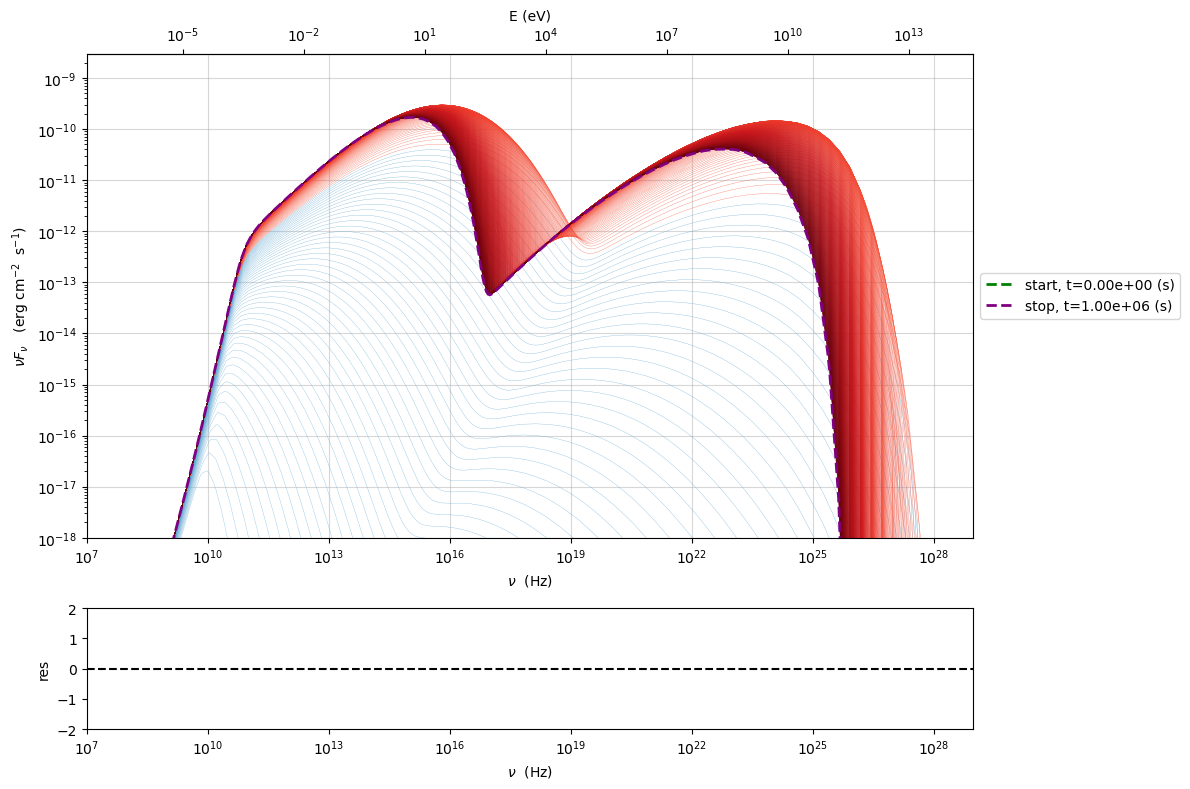

In [8]:
p=temp_ev_acc.plot_tempev_model(region='rad',sed_data=None, use_cached = True)
p.setlim(y_min=1E-18,x_min=1E7)

We generate a lightcurve in the range nu1=2.4E22 Hz, nu2=7.2E25 Hz, without the effect of the light crossing time, in the observer frame

In [9]:
lg=temp_ev_acc.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')


Text(0, 0.5, 'flux (erg / (s cm2))')

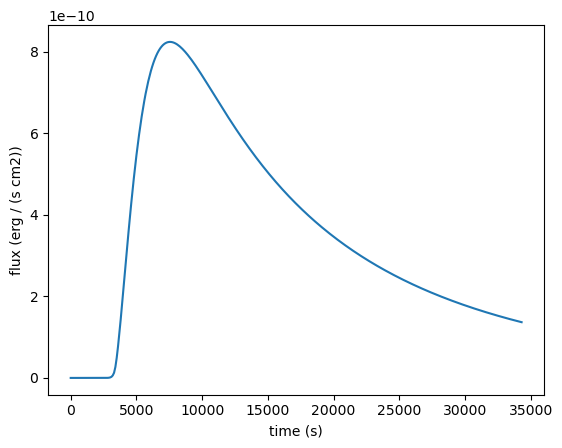

In [10]:
plt.plot(lg['time'],lg['flux'])
plt.xlabel('time (%s)'%lg['time'].unit)
plt.ylabel('flux (%s)'%lg['flux'].unit)

We generate a lightcurve in the range nu1=2.4E22 Hz, nu2=7.2E25 Hz, with the effect of the light crossing time, in the observer frame

In [11]:
lg_cross=temp_ev_acc.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=True,delta_t_out=100,use_cached=True,frame='obs',cross_time_slices=100)


Text(0, 0.5, 'flux (erg / (s cm2))')

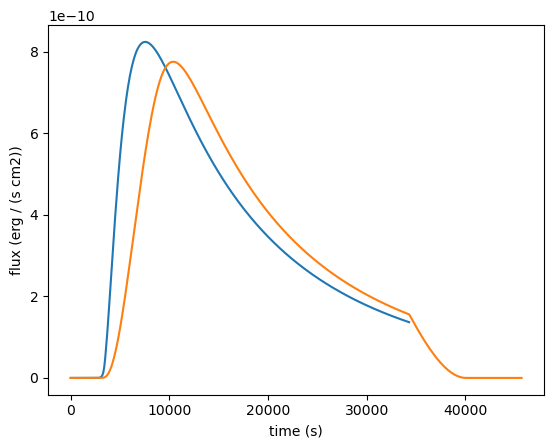

In [12]:
plt.plot(lg['time'],lg['flux'])
plt.plot(lg_cross['time'],lg_cross['flux'])

plt.xlabel('time (%s)'%lg['time'].unit)
plt.ylabel('flux (%s)'%lg['flux'].unit)

In [13]:
lr_1=temp_ev_acc.rad_region.make_lc(nu1=1E10,name='1E10 Hz',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')
lr_2=temp_ev_acc.rad_region.make_lc(nu1=5E9,name='1E9 Hz',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')


Text(0.5, 0, 'time (s)')

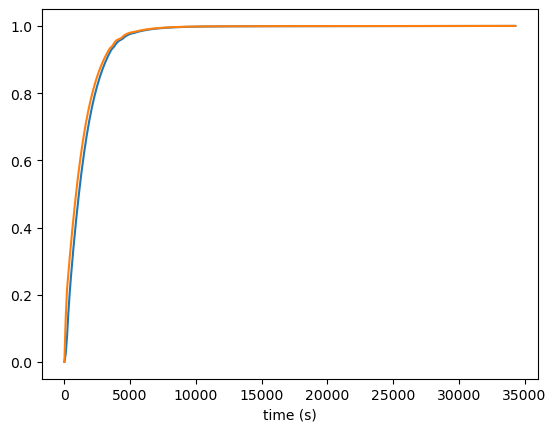

In [14]:
plt.plot(lr_1['time'],lr_1['flux']/lr_1['flux'].max())
plt.plot(lr_2['time'],lr_2['flux']/lr_2['flux'].max())

plt.xlabel('time (%s)'%lr_1['time'].unit)



In [15]:
lr_1_cross=temp_ev_acc.rad_region.make_lc(nu1=1E10,name='gamma',eval_cross_time=True,delta_t_out=100,use_cached=True,frame='obs',cross_time_slices=100)
lr_2_cross=temp_ev_acc.rad_region.make_lc(nu1=5E9,name='gamma',eval_cross_time=True,delta_t_out=100,use_cached=True,frame='obs',cross_time_slices=100)



Text(0.5, 0, 'time (s)')

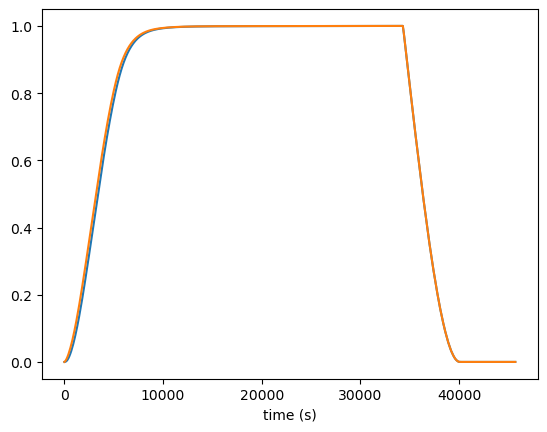

In [16]:
plt.plot(lr_1_cross['time'],lr_1_cross['flux']/lr_1_cross['flux'].max())
plt.plot(lr_2_cross['time'],lr_2_cross['flux']/lr_2_cross['flux'].max())

plt.xlabel('time (%s)'%lr_1_cross['time'].unit)



## Expanding the radiative region


We now plug the radiative region from `temp_ev_acc` to new model with adiabatic expansion

the following two functions define an estimate of the total extent of the simulation to follow the expansion 

In [17]:
def delta_t_est(t_exp,R0,beta_exp):
    return t_exp+R0/(beta_exp*3E10)

def t_dec_est(R0,a,beta_exp):
    return ((R0+beta_exp*3E10)*np.power(beta_exp*3E10,a))

we set the initial radius equal to the radius of the radiative region of  the `temp_ev_acc` model

In [18]:
t_exp=1E7
beta_exp=0.3
R0=temp_ev_acc.rad_region.jet.parameters.R.val
duration=delta_t_est(t_exp,R0,beta_exp)+10*t_dec_est(R0,-1,beta_exp)

we build the `temp_ev_expansion` expansion model

In [19]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_expansion=JetTimeEvol(jet_rad=temp_ev_acc.rad_region.jet,inplace=True,only_radiation=True,Q_inj=None)

temp_ev_expansion.rad_region.jet.nu_min=1E8
T_SIZE=np.int32(duration/1000)
NUM_SET=np.int32(T_SIZE)
NUM_SET=min(5000,NUM_SET)


temp_ev_expansion.parameters.TStart_Inj.val=-0
temp_ev_expansion.parameters.TStop_Inj.val=-0

temp_ev_expansion.parameters.duration.val=duration
temp_ev_expansion.parameters.T_esc_rad.val=1E60
temp_ev_expansion.parameters.Esc_Index_rad.val=0
temp_ev_expansion.parameters.t_size.val=T_SIZE
temp_ev_expansion.parameters.num_samples.val=NUM_SET


temp_ev_expansion.parameters.gmin_grid.val=1.0
temp_ev_expansion.parameters.gmax_grid.val=1E8
temp_ev_expansion.parameters.gamma_grid_size.val=1500




===> setting C threads to 12
===> setting C threads to 12
===> setting C threads to 12
===> setting C threads to 12


we set to `'on'` the region expansion, and we set the relevant paramters

In [20]:
temp_ev_expansion.region_expansion='on'
temp_ev_expansion.parameters.t_jet_exp.val=t_exp
temp_ev_expansion.parameters.beta_exp_R.val = beta_exp
temp_ev_expansion.parameters.R_rad_start.val = R0

In [21]:
temp_ev_expansion.init_TempEv()
temp_ev_expansion.show_model()

--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,1.000008e+03,s,0.005995894232556255,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Adiab. cooling,,on,,None,,False
Reg. expansion,,on,,None,,False
Tesc rad,time,1.667820e+65,s,1e+60,R/c,False
R_rad rad start,region_position,5.000000e+15,cm,None,,False
R_H rad start,region_position,1.000000e+17,cm,None,,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.611112e+07,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,T_esc_rad,escape_time,(R/c)*,1.000000e+60,--,--,False,True
jet_time_ev,Esc_Index_rad,fp_coeff_index,,0.000000e+00,--,--,False,True
jet_time_ev,R_rad_start,region_size,cm,5.000000e+15,0.000000e+00,--,False,True
jet_time_ev,R_H_rad_start,region_position,cm,1.000000e+17,0.000000e+00,--,False,True


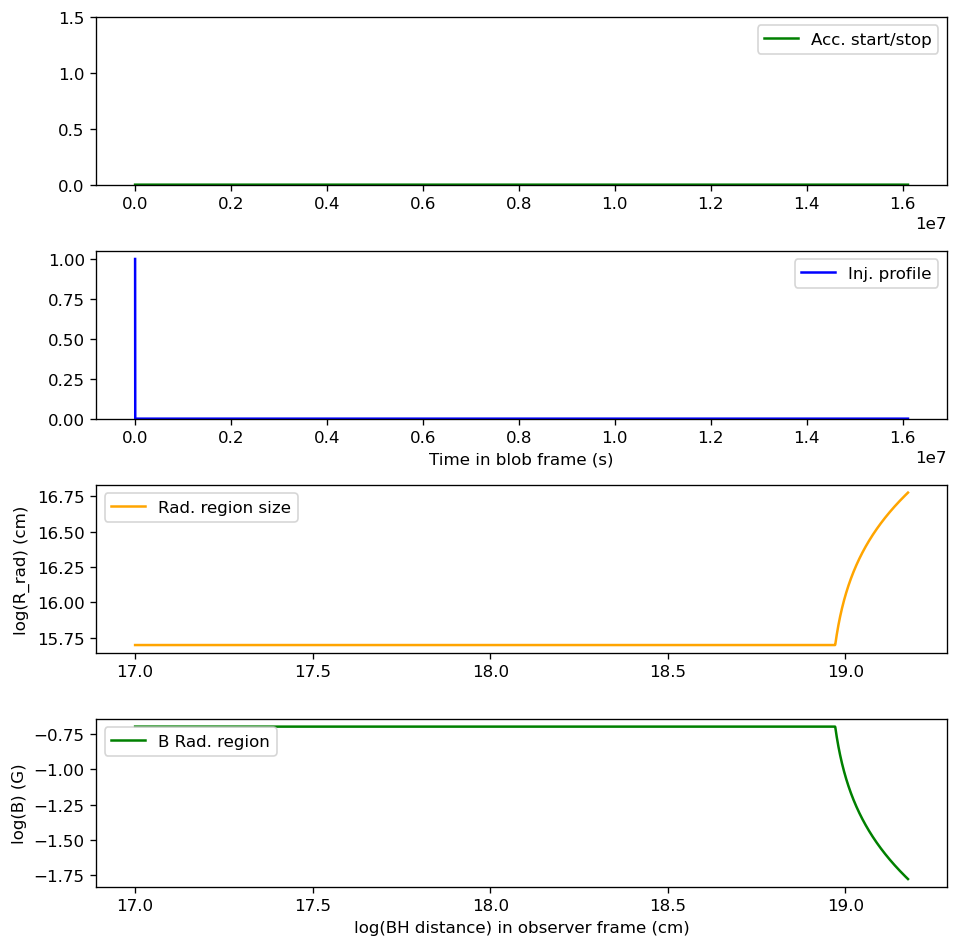

In [22]:
temp_ev_expansion.plot_time_profile()

In [23]:
temp_ev_expansion.run(cache_SEDs_rad=True,do_injection=False)

temporal evolution running


  0%|          | 0/16111 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done


we now evaluate light curves, and plot the combination of the flare and adiabatic expansion simulations, for both the radio and gamma

In [24]:
lr_1_exp=temp_ev_expansion.rad_region.make_lc(nu1=1E10,name='1E10 Hz',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')
lr_2_exp=temp_ev_expansion.rad_region.make_lc(nu1=5E9,name='1E9 Hz',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')
lr_1_exp['time']+=lr_1['time'][-1]
lr_2_exp['time']+=lr_2['time'][-1]

In [25]:
lg_exp=temp_ev_expansion.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')
lg=temp_ev_acc.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')
lg_exp['time']+=lg['time'][-1]


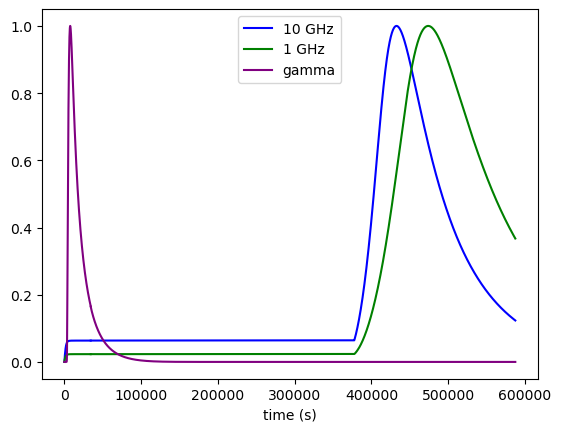

In [26]:
plt.plot(lr_1['time'],lr_1['flux']/lr_1_exp['flux'].max(),c='b')
plt.plot(lr_2['time'],lr_2['flux']/lr_2_exp['flux'].max(),c='g')

plt.plot(lr_1_exp['time'],lr_1_exp['flux']/lr_1_exp['flux'].max(),label='10 GHz',c='b')
plt.plot(lr_2_exp['time'],lr_2_exp['flux']/lr_2_exp['flux'].max(),label='1 GHz',c='g')
plt.plot(lg['time'],lg['flux']/lg['flux'].max(),c='purple',label='gamma')
plt.plot(lg_exp['time'],lg_exp['flux']/lg['flux'].max(),c='purple')
plt.xlabel('time (%s)'%lr_1['time'].unit)
plt.legend()

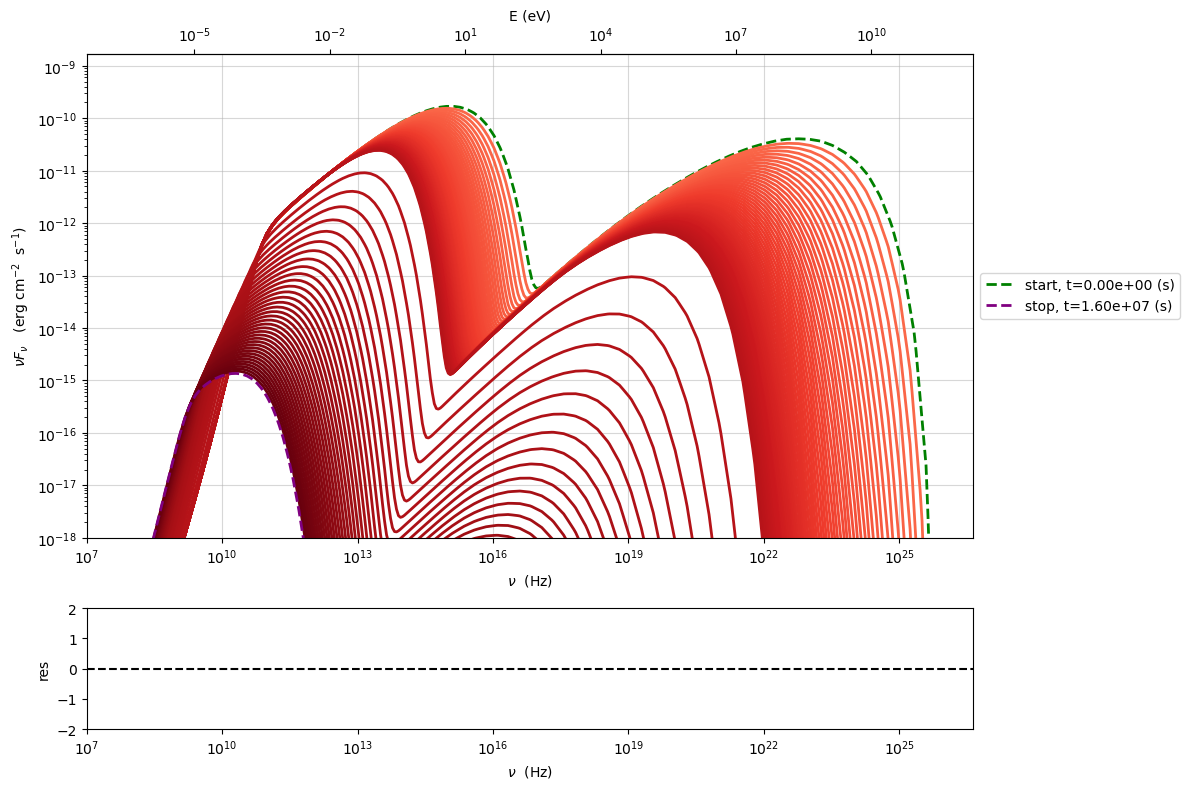

In [27]:
p=temp_ev_expansion.plot_tempev_model(region='rad',sed_data=None, use_cached = True,time_slice_bin=50)
p.setlim(y_min=1E-18,x_min=1E7)

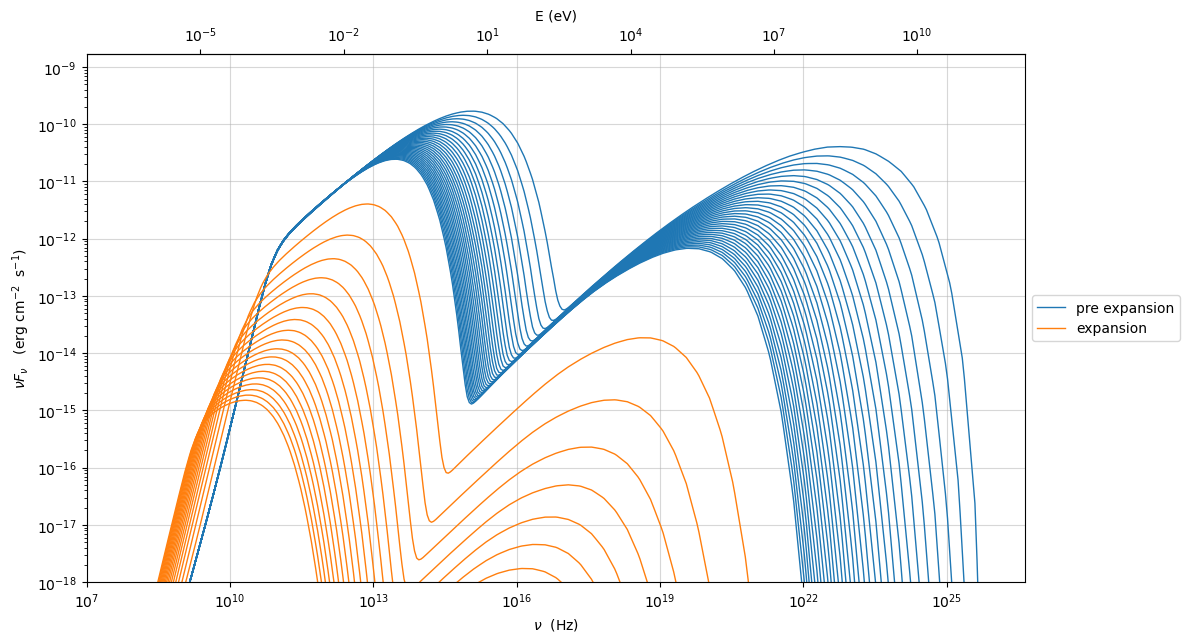

In [28]:
from jetset.plot_sedfit import PlotSED

p=PlotSED(frame='obs',density=False)
p.resplot.remove()
skip_label=False

step=int(temp_ev_expansion.parameters.num_samples.val/50)

for i in  range(0,NUM_SET,step):
    t=temp_ev_expansion.rad_region.time_sampled_emitters._get_time_samples(time_slice=i)
    s=temp_ev_expansion.rad_region.get_SED(comp='Sum',time_slice=i,frame='obs',use_cached=True)
    s_sync=temp_ev_expansion.rad_region.get_SED(comp='Sync',time_slice=i,frame='obs',use_cached=True)
    s_IC=temp_ev_expansion.rad_region.get_SED(comp='SSC',time_slice=i,frame='obs',use_cached=True)

    if t[0][0]<temp_ev_expansion.parameters.t_jet_exp.val:
        c='C0'
    else:
        c='C1'
    label=None
    if i==0:
        label='pre expansion'
    if t[0][0]>=temp_ev_expansion.parameters.t_jet_exp.val and skip_label is False:
        label='expansion'
        skip_label=True
    p.add_model_plot(model=s,label=label,color=c,density=False,auto_label=False)

p.setlim(y_min=1E-18,x_min=1E7)

